LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


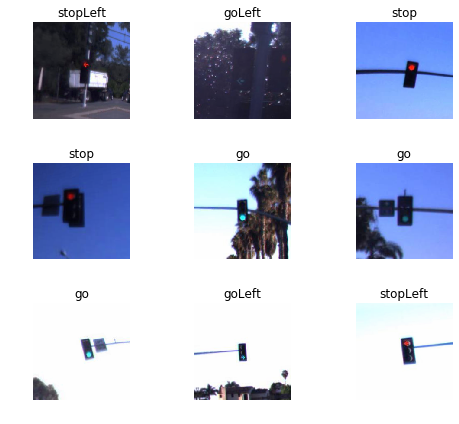

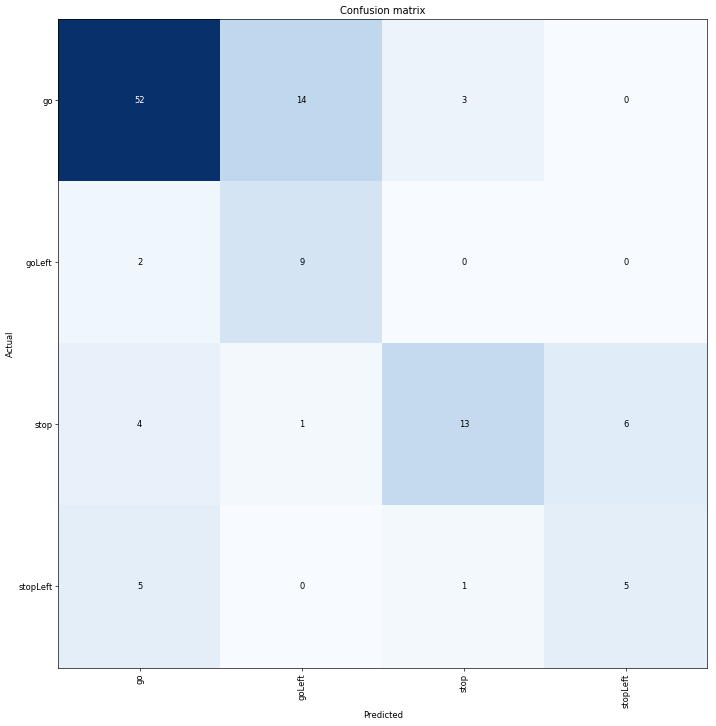

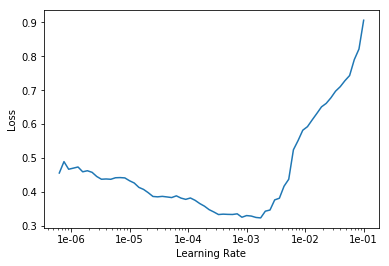

In [16]:
# Jupyter related code
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Importing libraries
from fastai.vision import *
from fastai.metrics import error_rate

bs = 16
master_path = Path('../data')
training_dataset_path = master_path/'training-dataset'

data = ImageDataBunch.from_folder(training_dataset_path
                                  , ds_tfms = get_transforms()
                                  , size = 224
                                  , bs = bs
                                 ).normalize(imagenet_stats)

data.show_batch(rows = 3, figsize = (7, 6))
learn = cnn_learner(data, models.resnet34, metrics = error_rate)
learn.fit_one_cycle(10)
learn.save('resnet-34-no_tunning', True)

interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
len(data.valid_ds) == len(losses) == len(idxs)
interp.plot_confusion_matrix(figsize = (12, 12), dpi = 60)

learn.unfreeze()
learn.load('resnet-34-no_tunning')
learn.lr_find()
learn.recorder.plot()

In [17]:
learn.unfreeze()

epochs = 8
min_range = 1e-6
max_range = 1e-3
max_lr = slice(min_range, max_range)
learn.fit_one_cycle(epochs, max_lr)

epoch,train_loss,valid_loss,error_rate,time
0,0.478314,0.860663,0.304348,00:01
1,0.409206,0.826325,0.269565,00:01
2,0.398934,0.764793,0.269565,00:01
3,0.353296,0.771428,0.286957,00:01
4,0.320818,0.694963,0.260870,00:01
5,0.295377,0.668034,0.252174,00:01
6,0.269359,0.684045,0.260870,00:01
7,0.256384,0.679742,0.260870,00:01


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


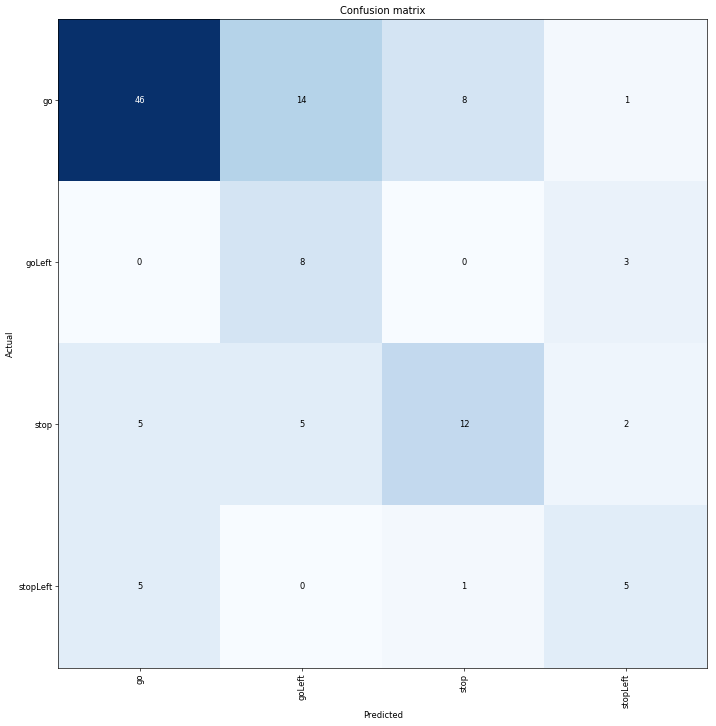

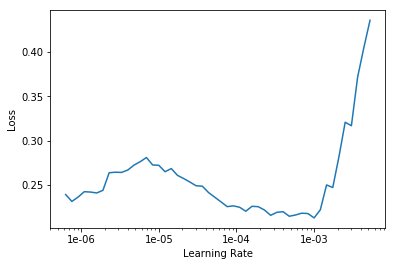

In [22]:
bs_50 = 32
data_50 = ImageDataBunch.from_folder(training_dataset_path
                                  , ds_tfms = get_transforms()
                                  , size = 224
                                  , bs = bs
                                 ).normalize(imagenet_stats)
learn_50 = cnn_learner(data, models.resnet50, metrics = error_rate)
learn_50.fit_one_cycle(10)
learn_50.save('resnet-50-no_tunning', True)

interp_50 = ClassificationInterpretation.from_learner(learn_50)
interp_50.plot_confusion_matrix(figsize = (12, 12), dpi = 60)

learn_50.unfreeze()
learn_50.load('resnet-50-no_tunning')
learn_50.lr_find()
learn_50.recorder.plot()

In [23]:
learn_50.unfreeze()

epochs = 10
min_range = 1e-5
max_range = 1e-3
max_lr = slice(min_range, max_range)
learn_50.fit_one_cycle(epochs, max_lr)

epoch,train_loss,valid_loss,error_rate,time
0,0.313704,1.014833,0.347826,00:02
1,0.257785,0.907100,0.321739,00:02
2,0.212983,0.688523,0.278261,00:02
3,0.222788,0.581618,0.217391,00:02
4,0.194272,0.585218,0.200000,00:02
5,0.177995,0.564532,0.165217,00:02
6,0.157871,0.469555,0.173913,00:02
7,0.133255,0.478184,0.182609,00:02
8,0.134912,0.474717,0.182609,00:02
9,0.124876,0.498285,0.182609,00:02
